In [1]:
!apt install fonts-nanum
!apt install g++ openjdk-8-jdk python3-dev
!pip3 install konlpy
!pip3 install wordcloud
!pip3 install ujson

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
python3-dev is already the newest version (3.6.7-1~18.04).
openjdk-8-jdk is already the newest version (8u292-b10-0ubuntu1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

plt.rcParams['axes.unicode_minus'] = False
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [3]:
DATA_DIR = '/content/drive/My Drive/Colab Notebooks/한철EL/'

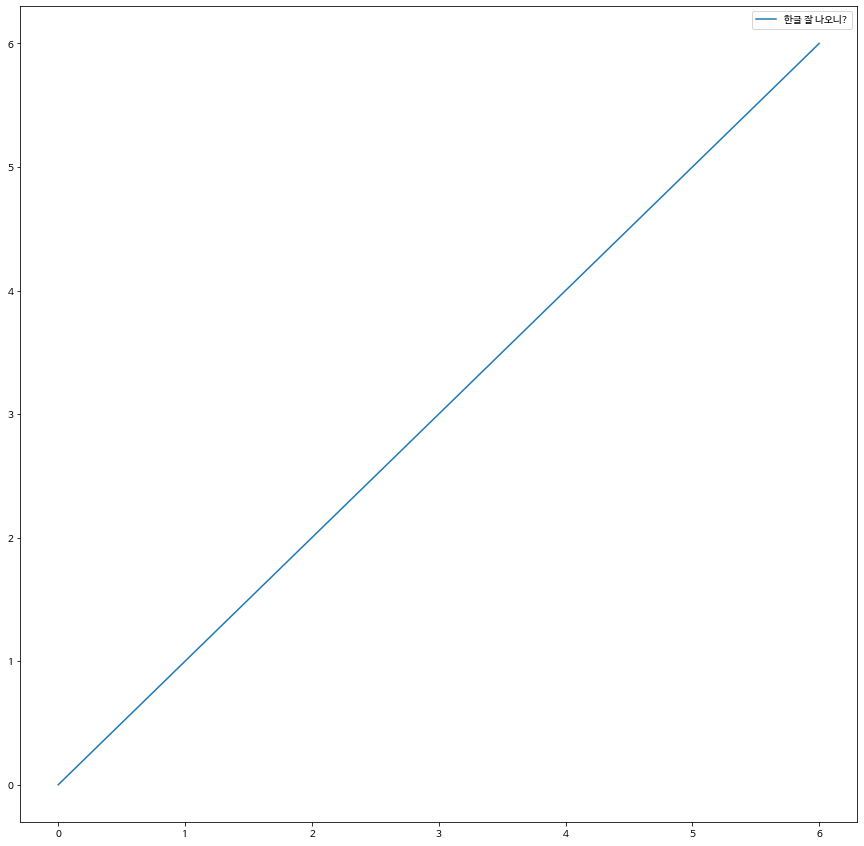

In [4]:
# matplotlib 차트 한글 표시 실험

plt.figure(figsize=(15, 15))
plt.plot([0, 6], [0, 6], label='한글 잘 나오니?')
plt.legend()
plt.show()

In [5]:
csv_file_name = pd.read_csv(DATA_DIR + 'merge.csv')
csv_file_name.drop(['time'], axis=1, inplace=True)
csv_file_name.drop(['title'], axis=1, inplace=True)
csv_file_name.drop(['url'], axis=1, inplace=True)

print(csv_file_name)

csv_file_name.to_csv(DATA_DIR + '언론사모음.csv',index=False, encoding="utf-8-sig")

      press
0     아시아경제
1    파이낸셜뉴스
2       MBC
3      연합뉴스
4     아시아경제
..      ...
423     뉴시스
424     한겨레
425    전자신문
426     한겨레
427     뉴스1

[428 rows x 1 columns]


In [6]:
press_count_list = csv_file_name.value_counts()
press_count_list = pd.DataFrame(press_count_list).reset_index() #series를 dataframe으로, index추가
press_count_list.columns = ['press', 'count'] #col 라벨 추가
press_count_list

,press,count
0,뉴시스,60
1,연합뉴스,54
2,머니투데이,32
3,뉴스1,30
4,중앙일보,29
5,이데일리,27
6,아시아경제,26
7,세계일보,24
8,서울신문,21
9,한국일보,13


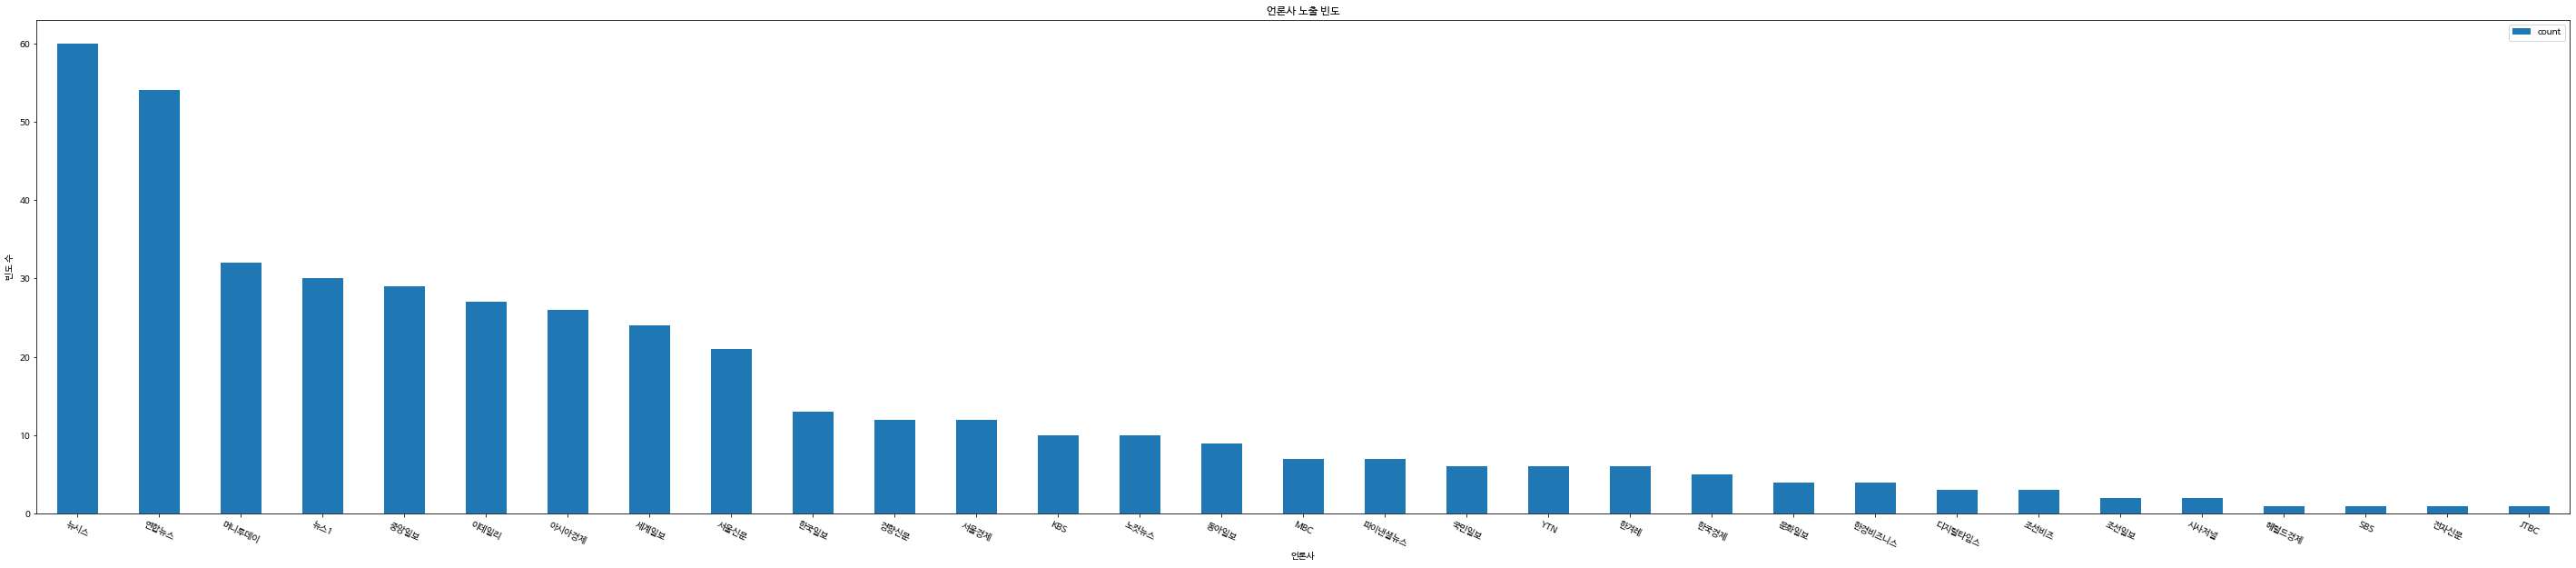

In [29]:
press_count_list.plot(kind='bar',x='press')
plt.title("언론사 노출 빈도")
plt.xlabel('언론사')
plt.ylabel('빈도 수')
plt.xticks(rotation = - 25 )
plt.rcParams["figure.figsize"] = (50, 100)
plt.show()

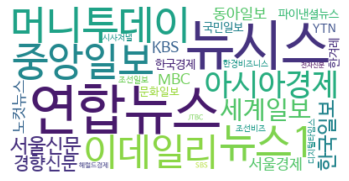

In [8]:
#워드클라우드 - 인덱스 순서에 따른 크기
from wordcloud import WordCloud

font_file_name = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
cloud_gen = WordCloud(font_path=font_file_name, max_words=200, collocations=False, background_color='white')

frequencies = press_count_list.set_index('press').to_dict()['count']

text = " ".join(press_count_list['press'])
keyword = cloud_gen.generate(text)

plt.figure()
plt.imshow(cloud_gen, interpolation="bilinear")
plt.axis("off")
plt.show()  

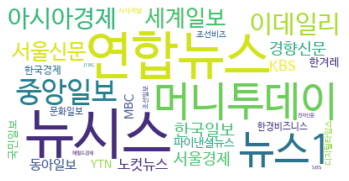

In [9]:
#워드클라우드 - 빈도수에 따른 크기
from wordcloud import WordCloud

font_file_name = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
cloud_gen = WordCloud(font_path=font_file_name, max_words=200, collocations=False, background_color='white')

#pandas에서 press를 인덱스로 하고, to_dict()[]에 적히는 열의 값을 value로 함.
frequencies = press_count_list.set_index('press').to_dict()['count']

#generate_from_frequencies : 빈도수에 따른 워드 클라우드 생성
keyword = cloud_gen.generate_from_frequencies(frequencies)

plt.figure()
plt.imshow(cloud_gen, interpolation="bilinear")
plt.axis("off")
plt.show()  


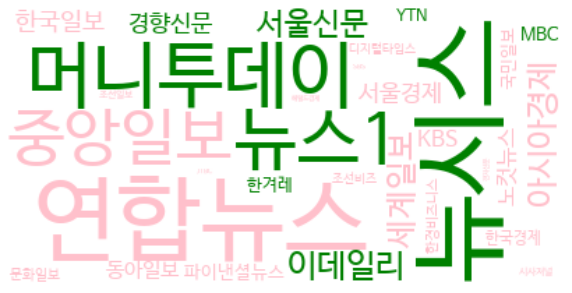

In [10]:
class SimpleGroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

color_to_words = {
    'green' : ['경향신문', '한겨레', '프레시안', '오마이뉴스', '뉴스1', '머니투데이', '이데일리', '미디어오늘', 'YTN',  'MBC', '뉴시스', '서울신문', '지디넷코리아', '내일신문']
}

default_color = 'pink'

wordcloud = WordCloud(font_path=font_file_name, max_words=200, collocations=False, background_color='white')

#pandas에서 press를 인덱스로 하고, to_dict()[]에 적히는 열의 값을 value로 함.
frequencies = press_count_list.set_index('press').to_dict()['count']

#generate_from_frequencies : 빈도수에 따른 워드 클라우드 생성
wordcloud = wordcloud.generate_from_frequencies(frequencies)

# text = " ".join(press_count_list['press'])
# keyword = wordcloud.generate(text)


simple_color_func = SimpleGroupedColorFunc(color_to_words, default_color)
wordcloud.recolor(color_func=simple_color_func)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [11]:
! pip install squarify 

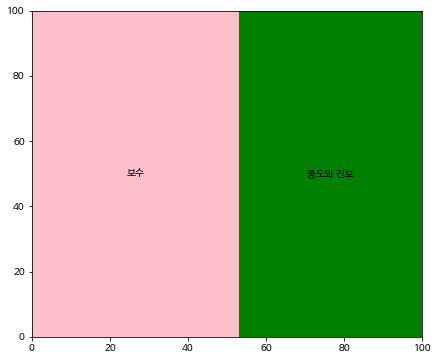

In [34]:
#python 트리맵

import squarify
import seaborn as sns
import matplotlib

def press_to_label(press) :
  #2:진보 | 1:중도(+ 지상파 3사) | 0:보수
  #뉴스1 : 머니투데이 소속
  if press == '경향신문' or press =='한겨레' or press =='프레시안' or press =='오마이뉴스' or press =='뉴스1' or press =='머니투데이' or press =='이데일리' or press =='미디어오늘' or press =='YTN' or press == 'MBC' or press =='뉴시스' or press =='서울신문' or press =='지디넷코리아' or press =='내일신문':
    return 1
  # elif  or press == 'KBS' or press == 'SBS' or press == '뉴시스'  or press =='한국일보' or press =='내일신문' or press == "파이낸셜뉴스"  :
  #   return 1
  else : 
    return 0

df = pd.read_csv(DATA_DIR+'언론사모음.csv')

df['y'] = df['press'].apply(lambda x: press_to_label(x))

df_counts = df['y'].value_counts()
df_counts = pd.DataFrame(df_counts).reset_index() #series를 dataframe으로, index추가
df_counts.columns = ['y', 'count'] #col 라벨 추가


df_pivot = df_counts.pivot_table(index='y', values = 'count', aggfunc = 'sum') # 피벗테이블 만들기
df_pivot = df_pivot.sort_values(by='count', ascending = False)  # 값 정렬하기

cmap = matplotlib.cm.Blues   # 값이 클 수록 진한 빨간색을 가지는 컬러맵
minimum=df_pivot['count'].min()
maximum=df_pivot['count'].max()
norm = matplotlib.colors.Normalize(vmin=minimum, vmax=maximum)   # 최소값, 최대값으로 정규화 하기
color_list = [cmap(norm(value)) for value in df_pivot['count']]       # 컬러 표현값으로 변경하기
color_list

plt.rcParams['figure.figsize'] = (7, 6)
squarify.plot(sizes=df_pivot['count'], label = ['보수','중도와 진보'], color=['pink','green'])

In [13]:
# from konlpy.tag import Okt 
# from collections import Counter 
# import csv 
# filename = input_file_name
# f = open(filename,'r',encoding='utf-8') 
# news = f.read() 

# # okt 객체 생성 
# okt = Okt() 
# noun = okt.nouns(news) 
# # for i,v in enumerate(noun): 
# #   if len(v)<2: 
# #     noun.pop(i) 
# count = Counter(noun) 
# f.close() 

# # 명사 빈도 카운트 
# noun_list = count.most_common(100) 
# for v in noun_list: 
#   print(v) # txt 파일에 저장 
  
# # with open(DATA_DIR + "논어_명사출현빈도.txt",'w',encoding='utf-8') as f: 
# #   for v in noun_list: 
# #     f.write(" ".join(map(str,v))) #튜플 int값을 str 타입으로 전환 후 조인 
# #     f.write("\n") 
    
# # # csv 파일에 저장 
# # with open(DATA_DIR + "논어_명사출현빈도.csv","w", newline='',encoding='utf-8') as f: 
# #   csvw = csv.writer(f) 
# #   csvw.writerow(['keyword', 'count'])
# #   for v in noun_list: 
# #     csvw.writerow(v)